# Aprendizagem Automática - Project 1

The object of the project is to predict the presence of a heart disease in patients. Previous research used 4 datasets: Cleveland, Hungary, Switzerland and VA Long Beach. This project focuses on the Cleveland dataset and uses a subset of 14 attributes that will be explained further in the notebook. 

### Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading the dataset

•	age : age of the patient in years 

•	sex : possible values 1 = male, 0 = female

•	cp : chest pain type 

•	trestbps : resting blood pressure 

•	chol : serum cholestoral in mg/dl

•	fbs : variable showing if fasting blood sugar is higher than 120 mg/dl 

•	restecg : resting electrocardiographic 

•	thalach : maximum heart rate achieved

•	exang : exercise induced angina (1 = yes; 0 = no)

•	oldpeak : ST depression induced by exercise relative to rest

•	slope : the slope of the peak exercise ST 

•	ca : number of major vessels (0-3) colored by flouroscopy

•	thal : a blood disorder called thalassemia


In [3]:
atributes=['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num'] 
df_heart_disease=pd.read_csv('processed.cleveland.data', names=atributes)

###### Preprocessing data - interpoling missing values with mean of the column

In [4]:
df_heart_disease.replace('?', np.nan, inplace=True)
df_heart_disease 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df_heart_disease = df_heart_disease.apply(pd.to_numeric, errors='ignore')

In [6]:
df_heart_disease = df_heart_disease.apply(lambda x: x.fillna(x.mean()))

In [7]:
df_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


###### Dividing the data on features X and target variable y

In [8]:
X=df_heart_disease.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0


In [9]:
y=df_heart_disease.iloc[:,-1:]
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


### Data visualization

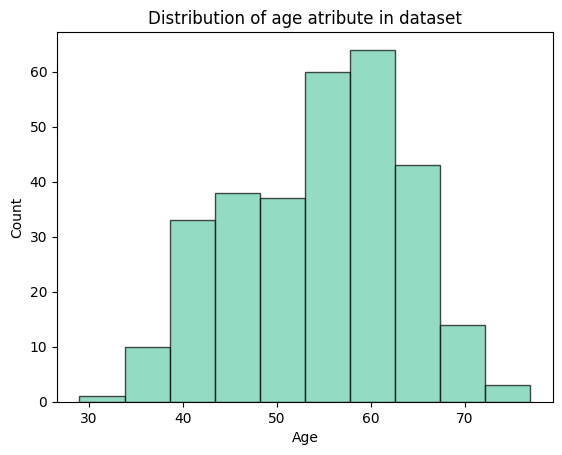

<Figure size 800x600 with 0 Axes>

In [10]:
plt.hist(df_heart_disease.age, color='mediumaquamarine', edgecolor='black', alpha=0.7)
plt.title('Distribution of age atribute in dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.figure(figsize=(8,6))
plt.savefig('age.png',dpi=300)
plt.show()

Plotting a histogram for each feature using subplot.

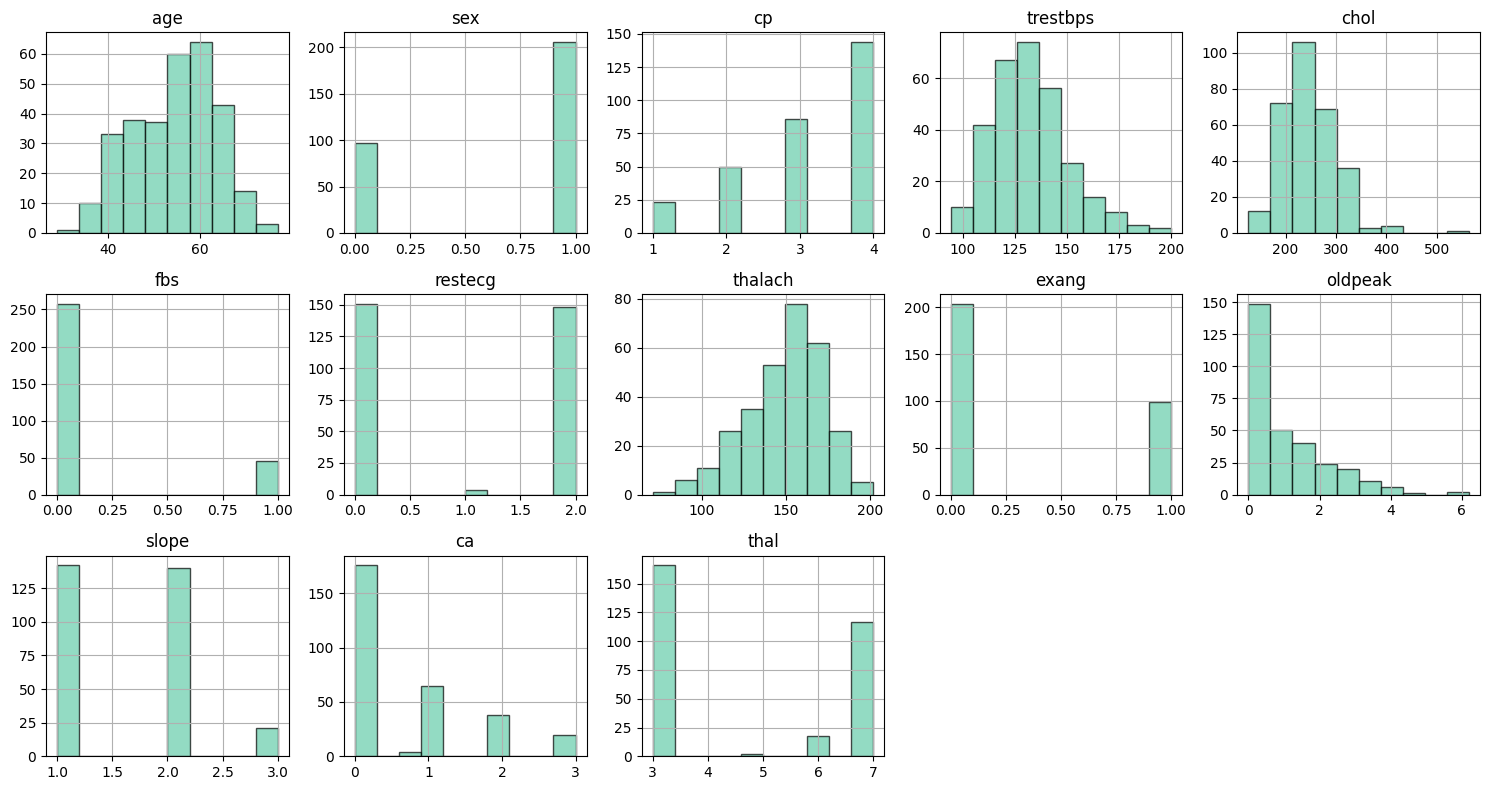

In [11]:
num_cols = len(X.columns)
num_rows = (num_cols +2) // 3  

fig, axes = plt.subplots(nrows=3, ncols=num_rows, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    X[col].hist(ax=axes[i], color='mediumaquamarine', edgecolor='black', alpha=0.7)  
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

Plotting box plots for each feature using subplots. 

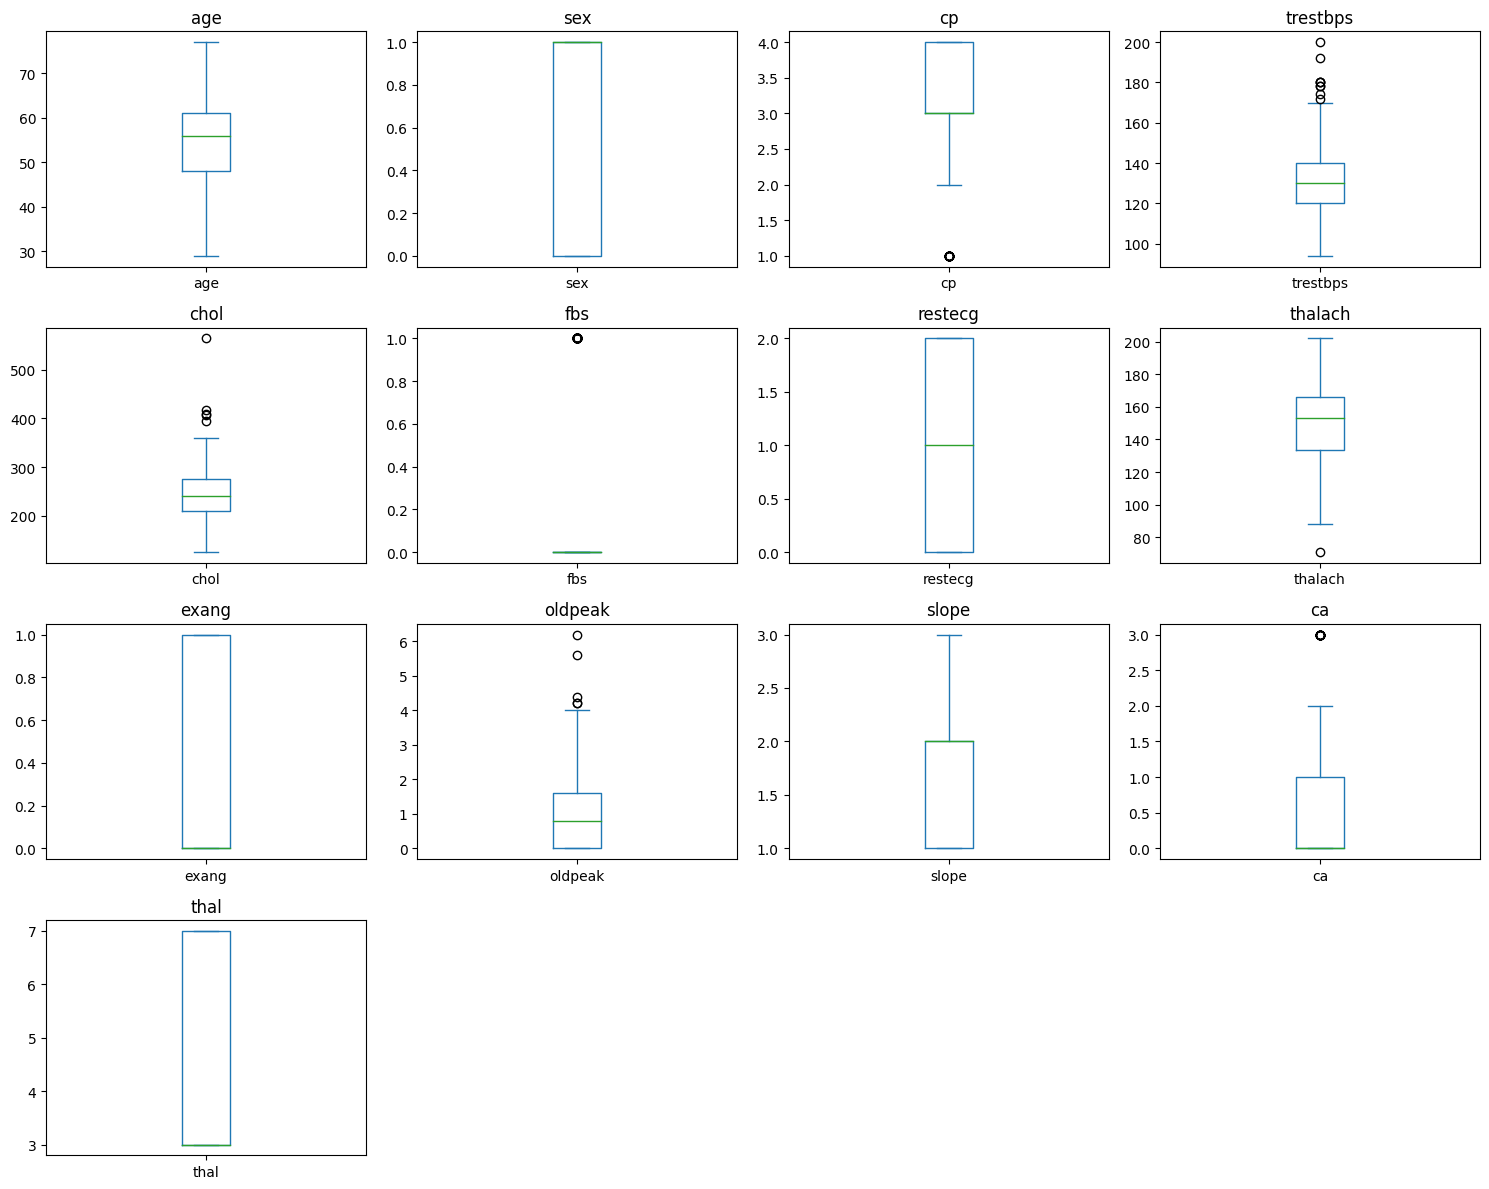

In [12]:
num_cols = len(X.columns)
num_rows = (num_cols +3) // 4

fig, axes = plt.subplots(nrows=4, ncols=num_rows, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    X[col].plot.box(ax=axes[i]) 
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

##### Correlation matrix for all variables and scatter plots for some combinations of variables

In [13]:
correlation_matrix = X.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.359489  0.092891  0.232332  0.098707  0.118525  0.143967   
thal      0.127368  0.379300  0.264895  0.133534  0.014190  0.07

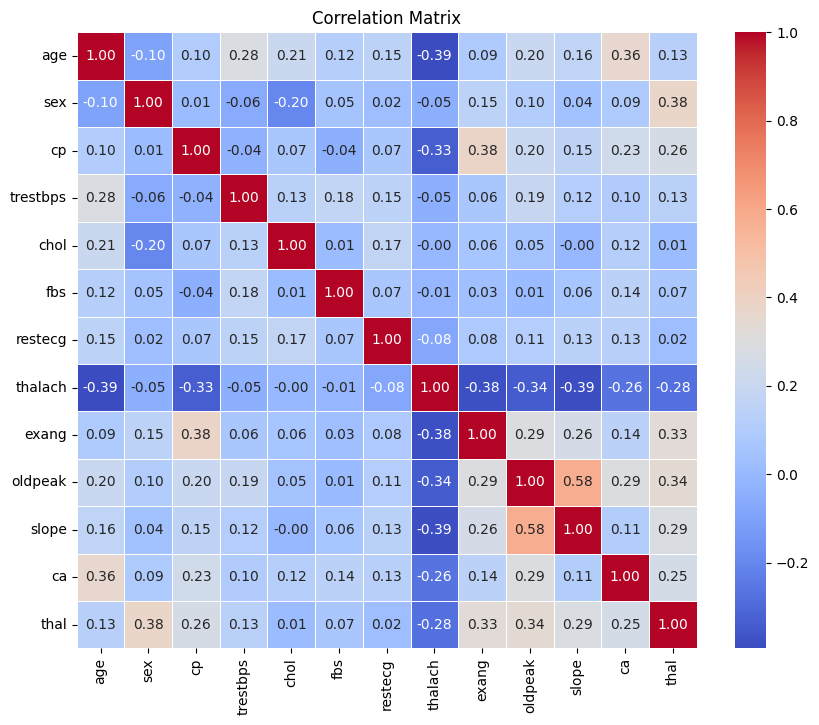

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Thalach')

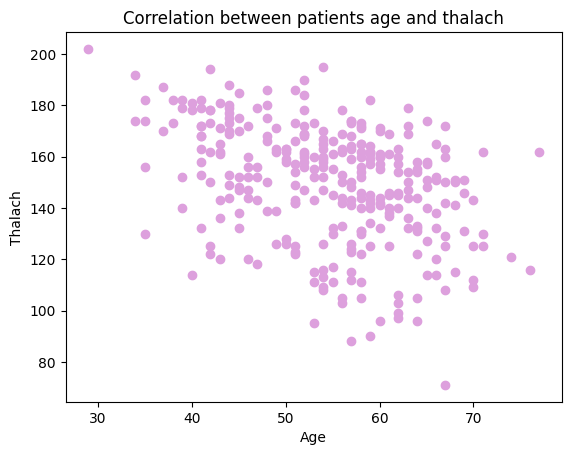

In [14]:
plt.scatter(X.age, X.thalach, color='plum')
plt.title('Correlation between patients age and thalach')
plt.xlabel('Age')
plt.ylabel('Thalach')

Text(0, 0.5, 'Trestbps')

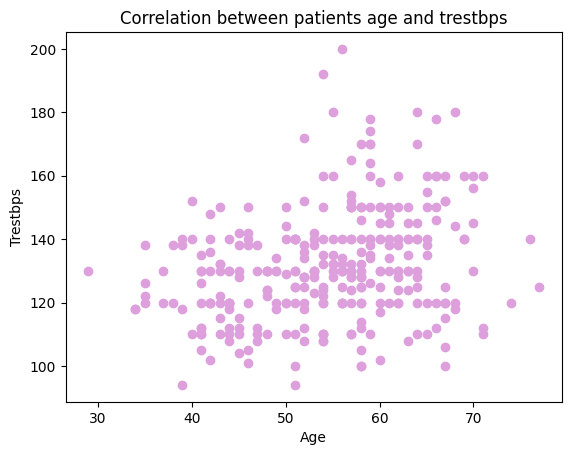

In [15]:
plt.scatter(X.age, X.trestbps, color='plum')
plt.title('Correlation between patients age and trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')

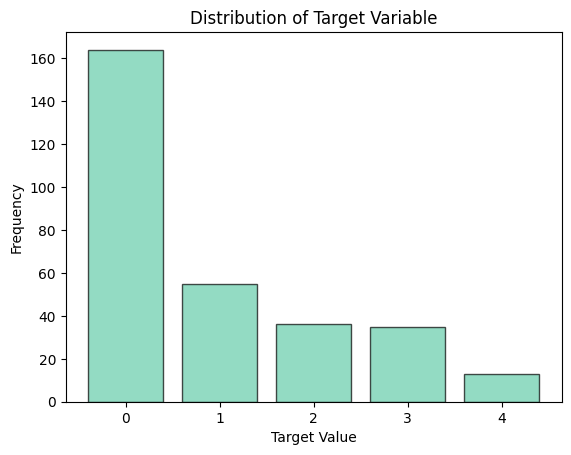

In [16]:
target=y.values
value_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for val in target:
    value_counts[val[0]] += 1

values = list(value_counts.keys())
counts = list(value_counts.values())

plt.bar(values, counts,color='mediumaquamarine', edgecolor='black', alpha=0.7)

plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

plt.show()

### Models used for predicting

##### Random Forest Classifier

In [56]:
def metrics_calculation(y_test, predictions):
    precision = precision_score(y_test, predictions, average=None,zero_division=1)
    recall = recall_score(y_test, predictions, average=None,zero_division=1)
    f1 = f1_score(y_test, predictions, average=None,zero_division=1)
    for class_label in range(len(precision)):
        print(f"Class {class_label}:")
        print("  Precision:", precision[class_label])
        print("  Recall:", recall[class_label])
        print("  F1 Score:", f1[class_label])
    print()
    overall_precision = precision_score(y_test, predictions, average='weighted',zero_division=1)
    overall_recall = recall_score(y_test, predictions, average='weighted',zero_division=1)
    overall_f1 = f1_score(y_test, predictions, average='weighted',zero_division=1)
    
    print("Overall Precision:", overall_precision)
    print("Overall Recall:", overall_recall)
    print("Overall F1 Score:", overall_f1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, np.ravel(y_train))
predictions = clf.predict(X_test)
accuracy = accuracy_score(np.ravel(y_test), predictions)

print("Accuracy of a Random Forest Classifier using 30% of dataset for training:", accuracy)

Accuracy of a Random Forest Classifier using 30% of dataset for training: 0.5604395604395604


In [60]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.7586206896551724
  Recall: 0.9166666666666666
  F1 Score: 0.830188679245283
Class 1:
  Precision: 0.21052631578947367
  Recall: 0.23529411764705882
  F1 Score: 0.2222222222222222
Class 2:
  Precision: 0.2857142857142857
  Recall: 0.16666666666666666
  F1 Score: 0.2105263157894737
Class 3:
  Precision: 0.14285714285714285
  Recall: 0.1
  F1 Score: 0.11764705882352941
Class 4:
  Precision: 1.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.5368119047144196
Overall Recall: 0.5604395604395604
Overall F1 Score: 0.5201057226292346


<AxesSubplot: >

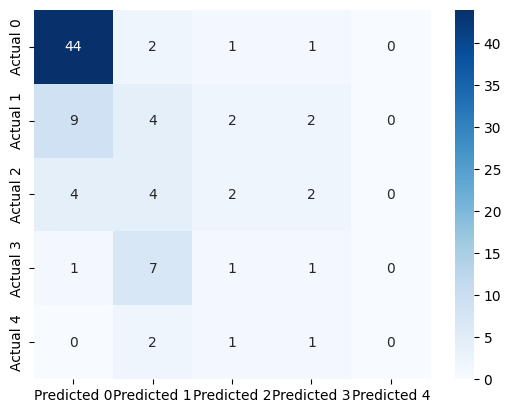

In [62]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, np.ravel(y_train))
predictions = clf.predict(X_test)
accuracy = accuracy_score(np.ravel(y_test), predictions)

print("Accuracy of a Random Forest Classifier using 50% of dataset for training:", accuracy)

Accuracy of a Random Forest Classifier using 50% of dataset for training: 0.5592105263157895


In [64]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.7373737373737373
  Recall: 0.9125
  F1 Score: 0.8156424581005587
Class 1:
  Precision: 0.21052631578947367
  Recall: 0.13793103448275862
  F1 Score: 0.16666666666666666
Class 2:
  Precision: 0.1875
  Recall: 0.15789473684210525
  F1 Score: 0.17142857142857143
Class 3:
  Precision: 0.3125
  Recall: 0.2631578947368421
  F1 Score: 0.2857142857142857
Class 4:
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.4907576457091693
Overall Recall: 0.5592105263157895
Overall F1 Score: 0.5182266070203441


<AxesSubplot: >

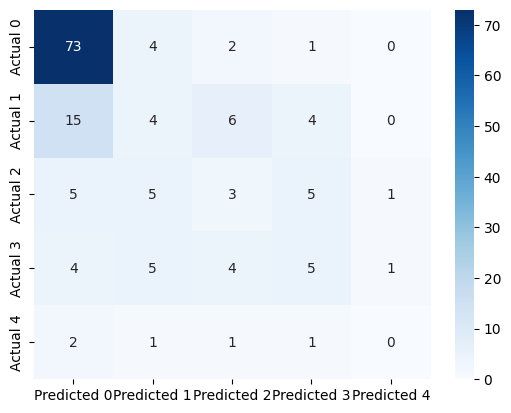

In [65]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

##### SVM 

In [66]:
svm_clf_linear = SVC(kernel='linear')  
svm_clf_linear.fit(X_train, np.ravel(y_train))
svm_predictions_linear = svm_clf_linear.predict(X_test)
svm_accuracy_linear = accuracy_score(np.ravel(y_test), svm_predictions_linear)

print("SVM Accuracy for linear kernel:", svm_accuracy_linear)

SVM Accuracy for linear kernel: 0.5394736842105263


In [67]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.7373737373737373
  Recall: 0.9125
  F1 Score: 0.8156424581005587
Class 1:
  Precision: 0.21052631578947367
  Recall: 0.13793103448275862
  F1 Score: 0.16666666666666666
Class 2:
  Precision: 0.1875
  Recall: 0.15789473684210525
  F1 Score: 0.17142857142857143
Class 3:
  Precision: 0.3125
  Recall: 0.2631578947368421
  F1 Score: 0.2857142857142857
Class 4:
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.4907576457091693
Overall Recall: 0.5592105263157895
Overall F1 Score: 0.5182266070203441


<AxesSubplot: >

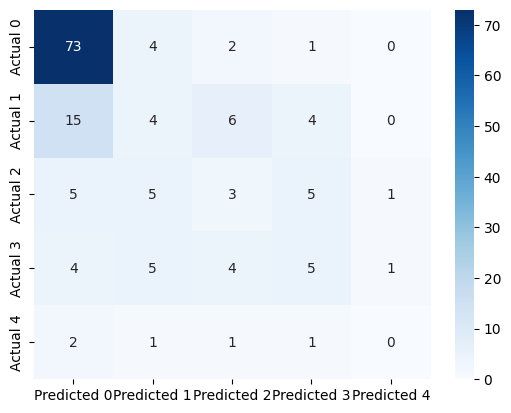

In [68]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

In [69]:
svm_clf_rbf = SVC(kernel='rbf')  
svm_clf_rbf.fit(X_train, np.ravel(y_train))
svm_predictions_rbf = svm_clf_rbf.predict(X_test)
svm_accuracy_rbf = accuracy_score(np.ravel(y_test), svm_predictions_rbf)

print("SVM Accuracy for rbf kernel:", svm_accuracy_rbf)

SVM Accuracy for rbf kernel: 0.5263157894736842


In [70]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.7373737373737373
  Recall: 0.9125
  F1 Score: 0.8156424581005587
Class 1:
  Precision: 0.21052631578947367
  Recall: 0.13793103448275862
  F1 Score: 0.16666666666666666
Class 2:
  Precision: 0.1875
  Recall: 0.15789473684210525
  F1 Score: 0.17142857142857143
Class 3:
  Precision: 0.3125
  Recall: 0.2631578947368421
  F1 Score: 0.2857142857142857
Class 4:
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.4907576457091693
Overall Recall: 0.5592105263157895
Overall F1 Score: 0.5182266070203441


<AxesSubplot: >

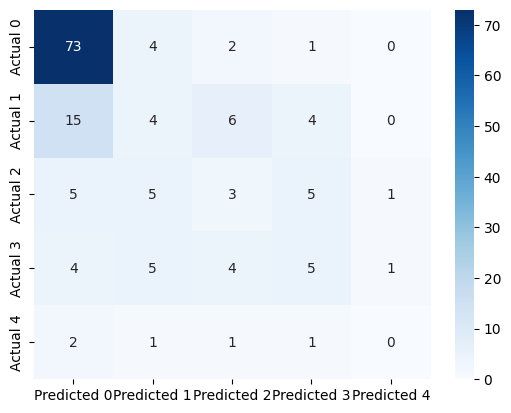

In [71]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

In [72]:
svm_clf_poly = SVC(kernel='poly')  
svm_clf_poly.fit(X_train, np.ravel(y_train))
svm_predictions_poly = svm_clf_poly.predict(X_test)
svm_accuracy_poly = accuracy_score(np.ravel(y_test), svm_predictions_poly)

print("SVM Accuracy for poly kernel:", svm_accuracy_poly)

SVM Accuracy for poly kernel: 0.5263157894736842


In [73]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.7373737373737373
  Recall: 0.9125
  F1 Score: 0.8156424581005587
Class 1:
  Precision: 0.21052631578947367
  Recall: 0.13793103448275862
  F1 Score: 0.16666666666666666
Class 2:
  Precision: 0.1875
  Recall: 0.15789473684210525
  F1 Score: 0.17142857142857143
Class 3:
  Precision: 0.3125
  Recall: 0.2631578947368421
  F1 Score: 0.2857142857142857
Class 4:
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.4907576457091693
Overall Recall: 0.5592105263157895
Overall F1 Score: 0.5182266070203441


<AxesSubplot: >

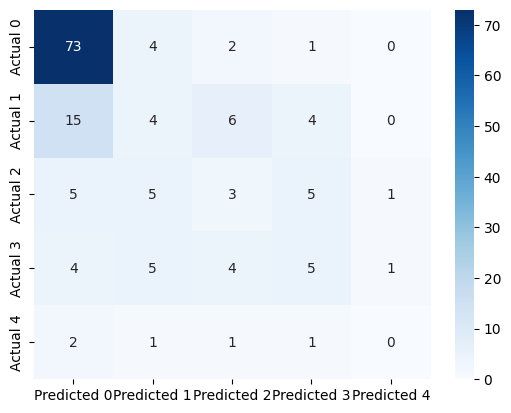

In [74]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

##### Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='auto', solver='sag',max_iter=10000)
model.fit(X_train,np.ravel(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5573770491803278


In [77]:
metrics_calculation(y_test, y_pred)

Class 0:
  Precision: 0.7567567567567568
  Recall: 0.9655172413793104
  F1 Score: 0.8484848484848485
Class 1:
  Precision: 0.6666666666666666
  Recall: 0.16666666666666666
  F1 Score: 0.26666666666666666
Class 2:
  Precision: 0.2857142857142857
  Recall: 0.2222222222222222
  F1 Score: 0.25
Class 3:
  Precision: 0.14285714285714285
  Recall: 0.2857142857142857
  F1 Score: 0.19047619047619047
Class 4:
  Precision: 1.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.6150389265143364
Overall Recall: 0.5573770491803278
Overall F1 Score: 0.5145802285146547


<AxesSubplot: >

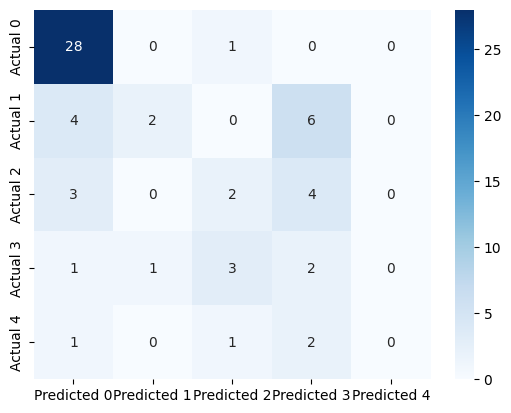

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='auto', solver='sag',max_iter=10000)
model.fit(X_train,np.ravel(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5934065934065934


In [81]:
metrics_calculation(y_test, y_pred)

Class 0:
  Precision: 0.7627118644067796
  Recall: 0.9375
  F1 Score: 0.8411214953271028
Class 1:
  Precision: 0.375
  Recall: 0.17647058823529413
  F1 Score: 0.24
Class 2:
  Precision: 0.4
  Recall: 0.16666666666666666
  F1 Score: 0.23529411764705882
Class 3:
  Precision: 0.21052631578947367
  Recall: 0.4
  F1 Score: 0.27586206896551724
Class 4:
  Precision: 1.0
  Recall: 0.0
  F1 Score: 0.0

Overall Precision: 0.5922025565870348
Overall Recall: 0.5934065934065934
Overall F1 Score: 0.5498459546936353


<AxesSubplot: >

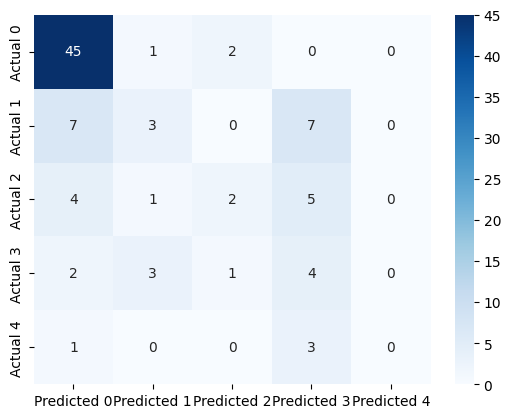

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

In [83]:
y['num']

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [84]:
y_modified = np.where(y['num'] == 0, 0, 1)
y_modified

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y_modified, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, np.ravel(y_train))
predictions = clf.predict(X_test)
accuracy = accuracy_score(np.ravel(y_test), predictions)

print("Accuracy of a Random Forest Classifier using 30% of dataset for training:", accuracy)

Accuracy of a Random Forest Classifier using 30% of dataset for training: 0.8351648351648352


In [87]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.8666666666666667
  Recall: 0.8125
  F1 Score: 0.8387096774193549
Class 1:
  Precision: 0.8043478260869565
  Recall: 0.8604651162790697
  F1 Score: 0.8314606741573034

Overall Precision: 0.8372193024366937
Overall Recall: 0.8351648351648352
Overall F1 Score: 0.8352843242295943


<AxesSubplot: >

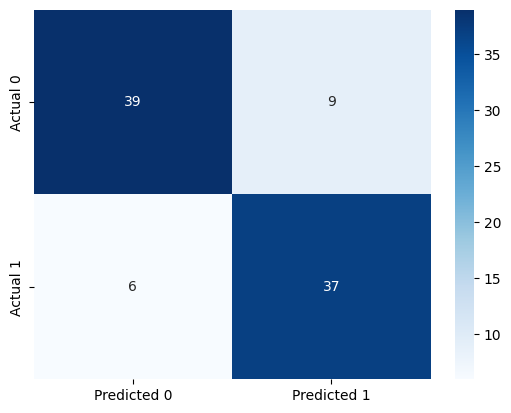

In [88]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y_modified, test_size=0.5, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, np.ravel(y_train))

predictions = clf.predict(X_test)
accuracy = accuracy_score(np.ravel(y_test), predictions)

print("Accuracy of a Random Forest Classifier using 50% of dataset for training:", accuracy)

Accuracy of a Random Forest Classifier using 50% of dataset for training: 0.8223684210526315


In [90]:
metrics_calculation(y_test, predictions)

Class 0:
  Precision: 0.8271604938271605
  Recall: 0.8375
  F1 Score: 0.8322981366459627
Class 1:
  Precision: 0.8169014084507042
  Recall: 0.8055555555555556
  F1 Score: 0.8111888111888113

Overall Precision: 0.8223009270698917
Overall Recall: 0.8223684210526315
Overall F1 Score: 0.8222989824820489


<AxesSubplot: >

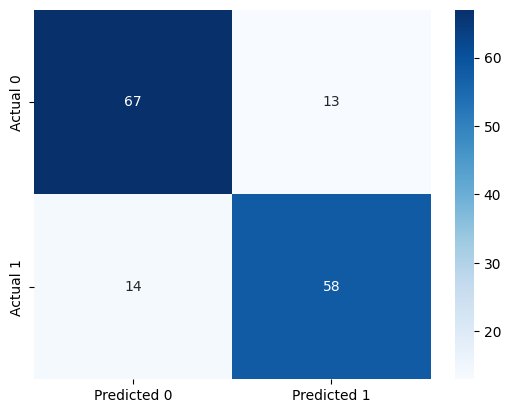

In [91]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y_modified, test_size=0.3, random_state=42)
svm_clf_linear = SVC(kernel='linear')  
svm_clf_linear.fit(X_train, np.ravel(y_train))
svm_predictions_linear = svm_clf_linear.predict(X_test)
svm_accuracy_linear = accuracy_score(np.ravel(y_test), svm_predictions_linear)

print("SVM Accuracy for linear kernel:", svm_accuracy_linear)

SVM Accuracy for linear kernel: 0.8681318681318682


In [93]:
metrics_calculation(y_test, svm_predictions_linear)

Class 0:
  Precision: 0.8913043478260869
  Recall: 0.8541666666666666
  F1 Score: 0.8723404255319149
Class 1:
  Precision: 0.8444444444444444
  Recall: 0.8837209302325582
  F1 Score: 0.8636363636363636

Overall Precision: 0.869161756118278
Overall Recall: 0.8681318681318682
Overall F1 Score: 0.8682275171636874


<AxesSubplot: >

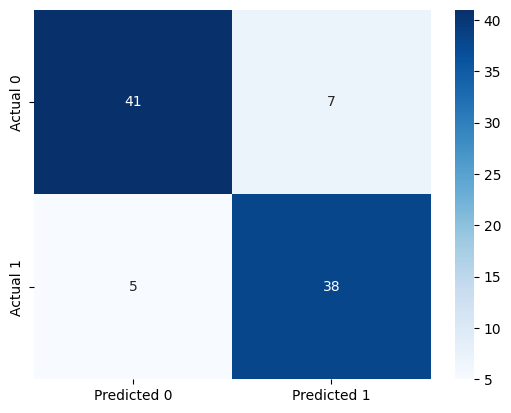

In [94]:
conf_matrix = confusion_matrix(y_test, svm_predictions_linear)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [95]:
svm_clf_rbf = SVC(kernel='rbf')  
svm_clf_rbf.fit(X_train, np.ravel(y_train))
svm_predictions_rbf = svm_clf_rbf.predict(X_test)
svm_accuracy_rbf = accuracy_score(np.ravel(y_test), svm_predictions_rbf)

print("SVM Accuracy for rbf kernel:", svm_accuracy_rbf)

SVM Accuracy for rbf kernel: 0.6593406593406593


In [96]:
metrics_calculation(y_test, svm_predictions_rbf)

Class 0:
  Precision: 0.6349206349206349
  Recall: 0.8333333333333334
  F1 Score: 0.7207207207207206
Class 1:
  Precision: 0.7142857142857143
  Recall: 0.46511627906976744
  F1 Score: 0.5633802816901409

Overall Precision: 0.6724228152799582
Overall Recall: 0.6593406593406593
Overall F1 Score: 0.6463730407392378


<AxesSubplot: >

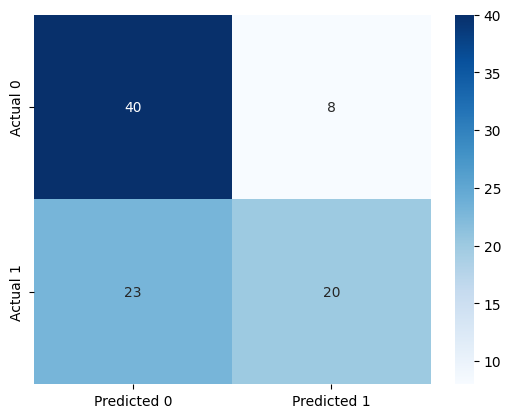

In [97]:
conf_matrix = confusion_matrix(y_test, svm_predictions_rbf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [98]:
svm_clf_poly = SVC(kernel='poly')  
svm_clf_poly.fit(X_train, np.ravel(y_train))
svm_predictions_poly = svm_clf_poly.predict(X_test)
svm_accuracy_poly = accuracy_score(np.ravel(y_test), svm_predictions_poly)

print("SVM Accuracy for poly kernel:", svm_accuracy_poly)

SVM Accuracy for poly kernel: 0.6703296703296703


In [99]:
metrics_calculation(y_test, svm_predictions_poly)

Class 0:
  Precision: 0.6551724137931034
  Recall: 0.7916666666666666
  F1 Score: 0.7169811320754716
Class 1:
  Precision: 0.696969696969697
  Recall: 0.5348837209302325
  F1 Score: 0.6052631578947368

Overall Precision: 0.6749227783710543
Overall Recall: 0.6703296703296703
Overall F1 Score: 0.6641913200999596


<AxesSubplot: >

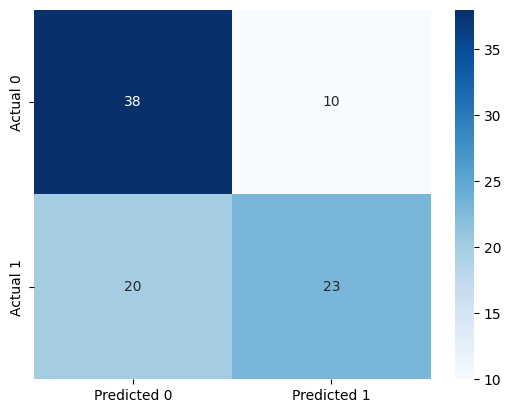

In [100]:
conf_matrix = confusion_matrix(y_test, svm_predictions_poly)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_modified, test_size=0.2, random_state=42)

model = LogisticRegression(solver='sag',max_iter=10000)
model.fit(X_train,np.ravel(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [103]:
metrics_calculation(y_test,y_pred )

Class 0:
  Precision: 0.8620689655172413
  Recall: 0.8620689655172413
  F1 Score: 0.8620689655172413
Class 1:
  Precision: 0.875
  Recall: 0.875
  F1 Score: 0.875

Overall Precision: 0.8688524590163934
Overall Recall: 0.8688524590163934
Overall F1 Score: 0.8688524590163934


<AxesSubplot: >

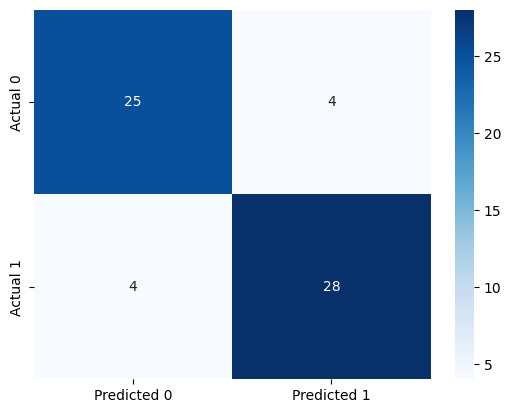

In [104]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y_modified, test_size=0.3, random_state=42)

model = LogisticRegression(solver='sag',max_iter=10000)
model.fit(X_train,np.ravel(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8461538461538461


In [107]:
metrics_calculation(y_test,y_pred)

Class 0:
  Precision: 0.8863636363636364
  Recall: 0.8125
  F1 Score: 0.8478260869565218
Class 1:
  Precision: 0.8085106382978723
  Recall: 0.8837209302325582
  F1 Score: 0.8444444444444444

Overall Precision: 0.8495759559589348
Overall Recall: 0.8461538461538461
Overall F1 Score: 0.8462281679672985


<AxesSubplot: >

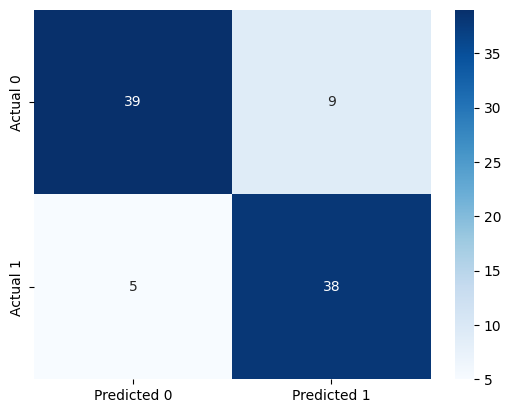

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])